In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [63]:
df = pd.read_excel("UNESCOs_Technology_Enabled_Open_School_Project_TeOSS_Learners_Training_Program_Post-Training_Assessment_.xlsx")
df.head()

,start,end,1. Name,2. Age,3. Gender,4. Name of School,5. Grade/Class,6. Region of School,7. How would you rate the overall training experience?,8. What aspects of the training did you enjoy most?,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2024-09-17 10:10:42.110,2024-09-17 10:18:55.756,SAMLA MELODY,11,Female,AKATSI NO.1 BASIC SCHOOL,Primary 2,Volta,Good,All aspects,...,384507902,0b06f199-2b8c-4a9e-ac5b-6f2e84c2d173,2024-09-17 10:18:57,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,1
1,2024-09-17 08:54:55.748,2024-09-17 10:30:09.788,MENSAH DENNIS,9,Male,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,TYPING,...,384513668,ba6b129d-4e76-4318-82c8-a800bba3bc00,2024-09-17 10:30:03,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,2
2,2024-09-17 10:30:10.002,2024-09-17 10:37:43.941,AMEEVOR EMMANUELLA,9,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,EVERYTHING,...,384517331,4fdf981d-5293-4e94-a6e0-6c5703a13070,2024-09-17 10:37:37,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,3
3,2024-09-17 10:37:44.060,2024-09-17 10:48:22.056,DOGBEY BLESS,8,Female,NaN,Primary 2,Volta,Very good,WHEN WE SANG,...,384522893,b2df8d95-1dd2-43fe-a159-43fdc3aa4a86,2024-09-17 10:48:15,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,4
4,2024-09-17 10:48:22.264,2024-09-17 11:21:45.844,SACKEY BETTY,11,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Very good,EVERYTHING,...,384539518,67f8f906-be24-419d-942b-23ca02bb2b91,2024-09-17 11:21:39,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,5


In [64]:
df.columns

Index(['start', 'end', '1. Name ', '2. Age', '3. Gender', '4. Name of School',
       '5. Grade/Class', '6. Region of School',
       '7. How would you rate the overall training experience?',
       '8. What aspects of the training did you enjoy most?',
       '9. Were the training objectives clearly communicated?',
       '10. How engaging did you find the training sessions?',
       '11. How effective were the trainers in delivering the content?',
       '12. How would you rate the training materials provided?',
       '13. What new skills or knowledge did you acquire from the training?',
       '14. How confident do you feel in using technology for learning after the training?',
       '15. What challenges did you encounter while using technology during the training?',
       '16. How do you plan to apply what you learned in your studies?',
       '17. What topics would you like to see covered in future training sessions?',
       '18. Do you have any suggestions to improve the trai

In [65]:
df.rename(columns = {"start":"start_time", "end":"end_time", "1. Name":"name", "2. Age":"age", "3. Gender":"gender", "4. Name of School":"name_of_school",
                    "5. Grade/Class":"grade_or_class", "6. Region of School":"region_of_school", "7. How would you rate the overall training experience?":"how_would_you_rate_the_overall_training_experience?",
                    "8. What aspects of the training did you enjoy most?":"what_aspects_of_the_training_did_you_enjoy_most?", "9. Were the training objectives clearly communicated?":"were_the_training_objectives_clearly_communicated?", 
                    "10. How engaging did you find the training sessions?":"how_engaging_did_you_find_the_training_sessions?", "11. How effective were the trainers in delivering the content?":"how_effective_were_the_trainers_in_delivering_the_content?", 
                    "12. How would you rate the training materials provided?":"how_would_you_rate_the_training_materials_provided?", "13. What new skills or knowledge did you acquire from the training?":"what_new_skills_or_knowledge_did_you_acquire_from_the_training?", 
                    "14. How confident do you feel in using technology for learning after the training?":"how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?", "15. What challenges did you encounter while using technology during the training?":"what_challenges_did_you_encounter_while_using_technology_during_the_training?",  
                    "16. How do you plan to apply what you learned in your studies?":"how_do_you_plan_to_apply_what_you_learned_in_your_studies?", "17. What topics would you like to see covered in future training sessions?":"what_topics_would_you_like_to_see_covered_in_future_training_sessions?",
                    "18. Do you have any suggestions to improve the training program?":"do_you_have_any_suggestions_to_improve_the_training_program?", "19. Any additional comments or feedback?":"any_additional_comments_or_feedback?" }, inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 46 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   start_time                                                                          1982 non-null   datetime64[ns]
 1   end_time                                                                            1982 non-null   datetime64[ns]
 2   1. Name                                                                             1958 non-null   object        
 3   age                                                                                 1957 non-null   object        
 4   gender                                                                              1929 non-null   object        
 5   name_of_school                                  

In [67]:
df_drop = df.drop(["4. Grade/Class", "5. Region of School", "6. How would you rate the overall training experience?",
             "7. What aspects of the training did you enjoy most?", "8. Were the training objectives clearly communicated?", "9. How engaging did you find the training sessions?",
             "10. How effective were the trainers in delivering the content?", "11. How would you rate the training materials provided?", "12. What new skills or knowledge did you acquire from the training?", 
             "13. How confident do you feel in using technology for learning after the training?", "14. What challenges did you encounter while using technology during the training?",
             "15. How do you plan to apply what you learned in your studies?", "16. What topics would you like to see covered in future training sessions?",
             "17. Do you have any suggestions to improve the training program?", "18. Any additional comments or feedback?", "_id", "_uuid", "_submission_time", "_validation_status", 
             "_notes", "_status", "_submitted_by", "__version__", "_tags", "_index"], axis = 1, inplace=True)

In [69]:
df.head()

,start_time,end_time,1. Name,age,gender,name_of_school,grade_or_class,region_of_school,how_would_you_rate_the_overall_training_experience?,what_aspects_of_the_training_did_you_enjoy_most?,...,how_engaging_did_you_find_the_training_sessions?,how_effective_were_the_trainers_in_delivering_the_content?,how_would_you_rate_the_training_materials_provided?,what_new_skills_or_knowledge_did_you_acquire_from_the_training?,how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?,what_challenges_did_you_encounter_while_using_technology_during_the_training?,how_do_you_plan_to_apply_what_you_learned_in_your_studies?,what_topics_would_you_like_to_see_covered_in_future_training_sessions?,do_you_have_any_suggestions_to_improve_the_training_program?,any_additional_comments_or_feedback?
0,2024-09-17 10:10:42.110,2024-09-17 10:18:55.756,SAMLA MELODY,11,Female,AKATSI NO.1 BASIC SCHOOL,Primary 2,Volta,Good,All aspects,...,Very engaging,Effective,Very good,How use the Tablet,Somewhat confident,How to type in the browser,Apply in my everyday life,Cyber security,Everyone to get Tablet,Everyone should involve
1,2024-09-17 08:54:55.748,2024-09-17 10:30:09.788,MENSAH DENNIS,9,Male,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,TYPING,...,Very engaging,Very effective,Very good,I CAN NOW TEACH MY PARENTS TO USE THE INTERNET,Confident,NO CHALLENGES,I WILL CONTINUE TO APPLY IT IN MY STUDIES AT HOME,TO EXPLORE THE INTERNET WITH SEARCH ENGINES FO...,THE TRAINING SHOULD BE REPEATED,I LOVE THE TRAINING
2,2024-09-17 10:30:10.002,2024-09-17 10:37:43.941,AMEEVOR EMMANUELLA,9,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,EVERYTHING,...,Very engaging,Effective,Good,HOW TO WRITE & LEARN,Confident,NO CHALLENGES,TO EXPLORE MORE,THE USE OF THE INTERNET,NO SUGGESTIONS,NO COMMENTS
3,2024-09-17 10:37:44.060,2024-09-17 10:48:22.056,DOGBEY BLESS,8,Female,NaN,Primary 2,Volta,Very good,WHEN WE SANG,...,Very engaging,Effective,Very good,PLAYING GAMES,Confident,NO CHALLENGES,TO EXPLORE THE INTERNET,WHERE WE WERE ASKED TO TYPE WORDS,NO SUGGESTIONS,NO ADDITIONAL COMMENTS
4,2024-09-17 10:48:22.264,2024-09-17 11:21:45.844,SACKEY BETTY,11,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Very good,EVERYTHING,...,Very engaging,Very effective,Very good,KIDD. COM,Confident,NO CHALLENGES,TO TEACH OTHERS,ANY NEW DISCORVERIES,NO SUGGESTIONS,NO COMMENTS


In [70]:
df.describe()

,start_time,end_time
count,1982,1982
mean,2024-09-21 10:12:53.702048,2024-09-21 11:09:04.956091136
min,2024-09-17 06:44:23.001000,2024-09-17 06:51:51.590000
25%,2024-09-18 14:52:34.972499968,2024-09-18 15:06:30.503249920
50%,2024-09-19 21:00:37.370500096,2024-09-20 09:37:57.708499968
75%,2024-09-24 14:18:34.969499904,2024-09-24 14:29:41.175749888
max,2024-10-03 19:13:54.022000,2024-10-03 19:15:16.860000


In [71]:
df.isna().sum()

start_time                                                                          0
end_time                                                                            0
1. Name                                                                            24
age                                                                                25
gender                                                                             53
name_of_school                                                                    103
grade_or_class                                                                     73
region_of_school                                                                   46
how_would_you_rate_the_overall_training_experience?                                43
what_aspects_of_the_training_did_you_enjoy_most?                                  254
were_the_training_objectives_clearly_communicated?                                 60
how_engaging_did_you_find_the_training_sessions?      

In [72]:
df.dropna(how='all')

,start_time,end_time,1. Name,age,gender,name_of_school,grade_or_class,region_of_school,how_would_you_rate_the_overall_training_experience?,what_aspects_of_the_training_did_you_enjoy_most?,...,how_engaging_did_you_find_the_training_sessions?,how_effective_were_the_trainers_in_delivering_the_content?,how_would_you_rate_the_training_materials_provided?,what_new_skills_or_knowledge_did_you_acquire_from_the_training?,how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?,what_challenges_did_you_encounter_while_using_technology_during_the_training?,how_do_you_plan_to_apply_what_you_learned_in_your_studies?,what_topics_would_you_like_to_see_covered_in_future_training_sessions?,do_you_have_any_suggestions_to_improve_the_training_program?,any_additional_comments_or_feedback?
0,2024-09-17 10:10:42.110,2024-09-17 10:18:55.756,SAMLA MELODY,11,Female,AKATSI NO.1 BASIC SCHOOL,Primary 2,Volta,Good,All aspects,...,Very engaging,Effective,Very good,How use the Tablet,Somewhat confident,How to type in the browser,Apply in my everyday life,Cyber security,Everyone to get Tablet,Everyone should involve
1,2024-09-17 08:54:55.748,2024-09-17 10:30:09.788,MENSAH DENNIS,9,Male,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,TYPING,...,Very engaging,Very effective,Very good,I CAN NOW TEACH MY PARENTS TO USE THE INTERNET,Confident,NO CHALLENGES,I WILL CONTINUE TO APPLY IT IN MY STUDIES AT HOME,TO EXPLORE THE INTERNET WITH SEARCH ENGINES FO...,THE TRAINING SHOULD BE REPEATED,I LOVE THE TRAINING
2,2024-09-17 10:30:10.002,2024-09-17 10:37:43.941,AMEEVOR EMMANUELLA,9,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,EVERYTHING,...,Very engaging,Effective,Good,HOW TO WRITE & LEARN,Confident,NO CHALLENGES,TO EXPLORE MORE,THE USE OF THE INTERNET,NO SUGGESTIONS,NO COMMENTS
3,2024-09-17 10:37:44.060,2024-09-17 10:48:22.056,DOGBEY BLESS,8,Female,NaN,Primary 2,Volta,Very good,WHEN WE SANG,...,Very engaging,Effective,Very good,PLAYING GAMES,Confident,NO CHALLENGES,TO EXPLORE THE INTERNET,WHERE WE WERE ASKED TO TYPE WORDS,NO SUGGESTIONS,NO ADDITIONAL COMMENTS
4,2024-09-17 10:48:22.264,2024-09-17 11:21:45.844,SACKEY BETTY,11,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Very good,EVERYTHING,...,Very engaging,Very effective,Very good,KIDD. COM,Confident,NO CHALLENGES,TO TEACH OTHERS,ANY NEW DISCORVERIES,NO SUGGESTIONS,NO COMMENTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,2024-09-20 19:04:43.866,2024-09-20 19:08:42.196,Yvonne Nhyira Ama Twum-Barimah,11,Female,Elmina Methodist JHS,JHS 2,Central,Excellent,How to turn on your wifi,...,Very engaging,Effective,Excellent,NaN,Confident,More learning skills,Revice,ICT,To help younger children how to use the Internet,To learn harder
1978,2024-09-20 19:08:42.290,2024-09-20 19:08:48.246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,2024-09-20 19:08:48.335,2024-09-20 19:08:56.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,2024-09-20 19:08:56.464,2024-09-20 19:09:50.252,Yvonne Nhyira Ama Twum-Barimah,11,Female,NaN,JHS 2,Central,Excellent,How to usetheInte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1977    False
1978    False
1979    False
1980    False
1981    False
Length: 1982, dtype: bool

In [74]:
df.columns

Index(['start_time', 'end_time', '1. Name ', 'age', 'gender', 'name_of_school',
       'grade_or_class', 'region_of_school',
       'how_would_you_rate_the_overall_training_experience?',
       'what_aspects_of_the_training_did_you_enjoy_most?',
       'were_the_training_objectives_clearly_communicated?',
       'how_engaging_did_you_find_the_training_sessions?',
       'how_effective_were_the_trainers_in_delivering_the_content?',
       'how_would_you_rate_the_training_materials_provided?',
       'what_new_skills_or_knowledge_did_you_acquire_from_the_training?',
       'how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?',
       'what_challenges_did_you_encounter_while_using_technology_during_the_training?',
       'how_do_you_plan_to_apply_what_you_learned_in_your_studies?',
       'what_topics_would_you_like_to_see_covered_in_future_training_sessions?',
       'do_you_have_any_suggestions_to_improve_the_training_program?',
       'any_additional_comments

In [75]:
df.describe()

,start_time,end_time
count,1982,1982
mean,2024-09-21 10:12:53.702048,2024-09-21 11:09:04.956091136
min,2024-09-17 06:44:23.001000,2024-09-17 06:51:51.590000
25%,2024-09-18 14:52:34.972499968,2024-09-18 15:06:30.503249920
50%,2024-09-19 21:00:37.370500096,2024-09-20 09:37:57.708499968
75%,2024-09-24 14:18:34.969499904,2024-09-24 14:29:41.175749888
max,2024-10-03 19:13:54.022000,2024-10-03 19:15:16.860000


how_would_you_rate_the_overall_training_experience?
Excellent    1130
Very good     629
Good          174
Poor            6
Name: count, dtype: int64


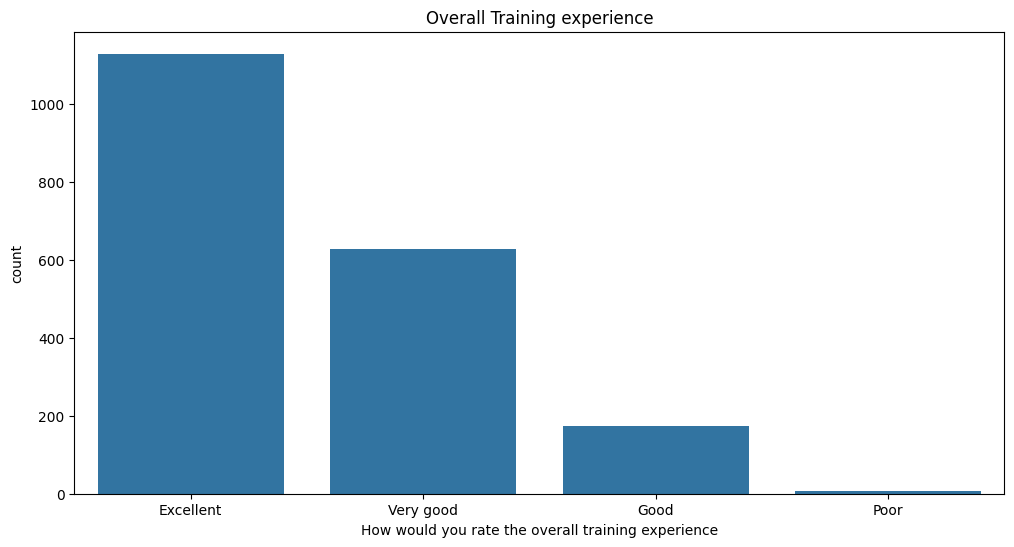

In [97]:
training_experience = df["how_would_you_rate_the_overall_training_experience?"].value_counts()
print(training_experience)

plt.figure(figsize = (12,6))
sns.barplot(data = training_experience)
plt.title("Overall Training experience")
plt.xlabel("How would you rate the overall training experience")
plt.savefig("overall_experience.png")
plt.show()

In [77]:
df["what_aspects_of_the_training_did_you_enjoy_most?"].unique()

array(['All aspects', 'TYPING', 'EVERYTHING', 'WHEN WE SANG',
       'Kiddconner', 'Video part', 'Typing', 'THE BROWSER',
       'Cyber security', 'Drawing', nan, 'Games', 'Research',
       'Internet surfing', 'Internet browsing part',
       'Browsing the internet', 'Fun games', 'MONKEY SEE MONKEY DO',
       'Navigating through the apps on the tablets',
       'Typing using search engine', 'Uses of Internet',
       'Accessing the internet',
       'How I access the internet for first time', 'hands-on', 'hand-on',
       'Practicals', 'practical', 'The practical session',
       'Pratical session', 'Practical Lessions', 'practical class',
       'Everything able the training', 'Demonstration session',
       'The dancing and the going through the tablet',
       'Every aspect of it', 'All', 'Visiting the internet',
       'EVERY ASPECT', 'WEB BROWSER', 'WHEN WE WERE USING THE TABLET',
       'Cyber Security', 'Khan academy', 'Exploring the search engines',
       'Using web browsers

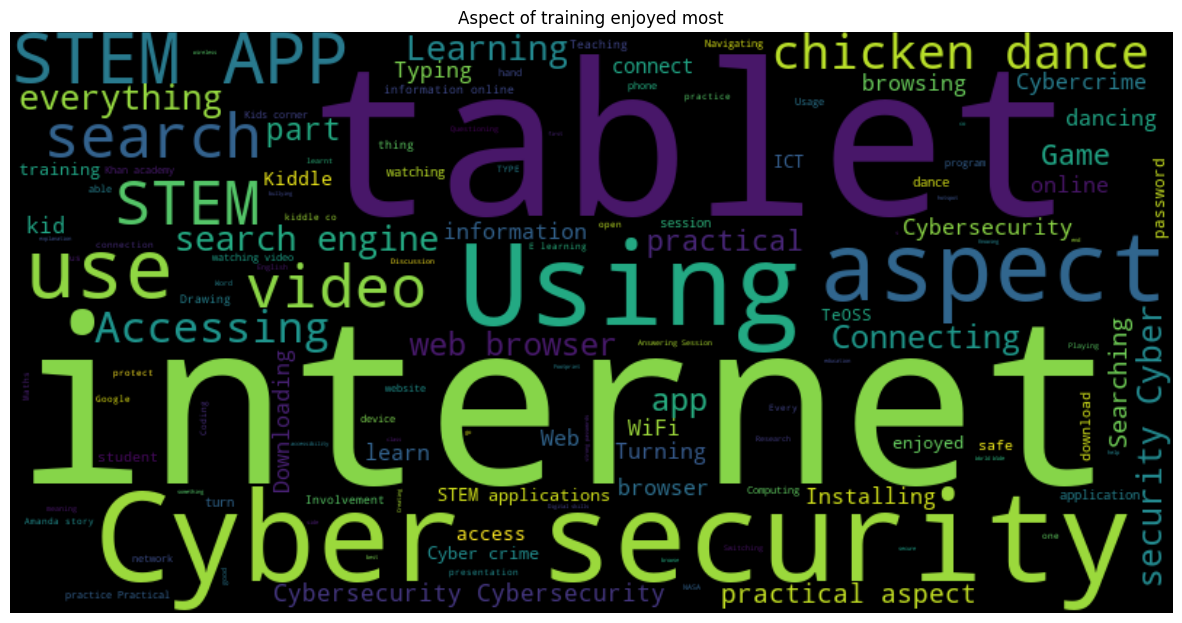

In [89]:
training_aspect = df["what_aspects_of_the_training_did_you_enjoy_most?"]

# Join all responses into a single string
text = " ".join(training_aspect.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=40).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Aspect of training enjoyed most")
plt.axis("off")
plt.savefig("aspect_training.png")
plt.show()

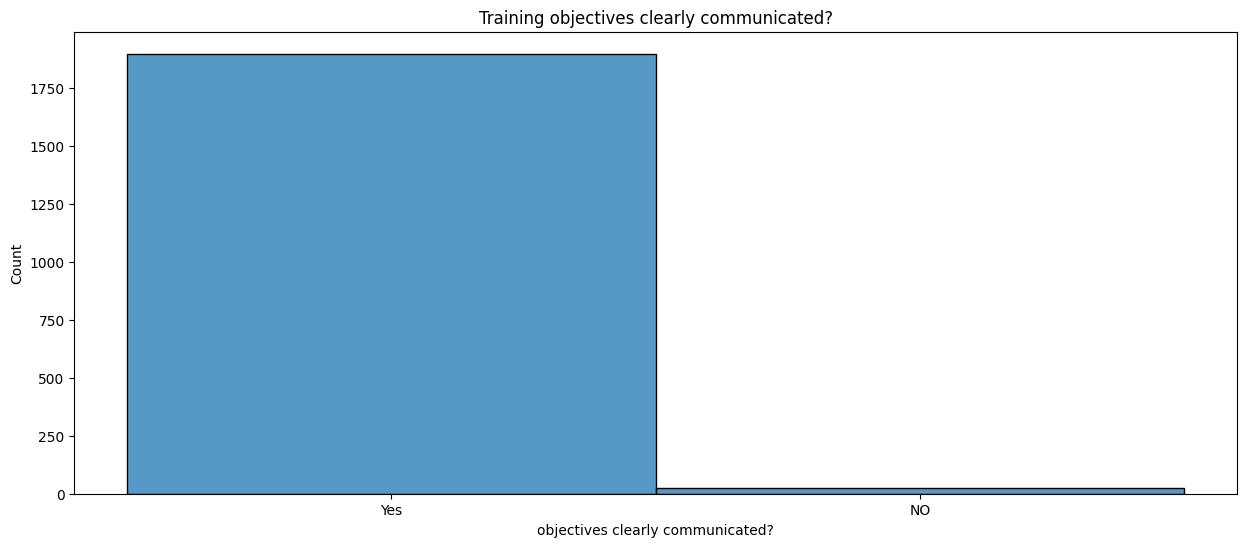

In [90]:

plt.figure(figsize = (15,6))
sns.histplot(data = df["were_the_training_objectives_clearly_communicated?"])
plt.title("Training objectives clearly communicated?")
plt.xlabel("objectives clearly communicated?")
plt.savefig("train_objs.png")
plt.show()

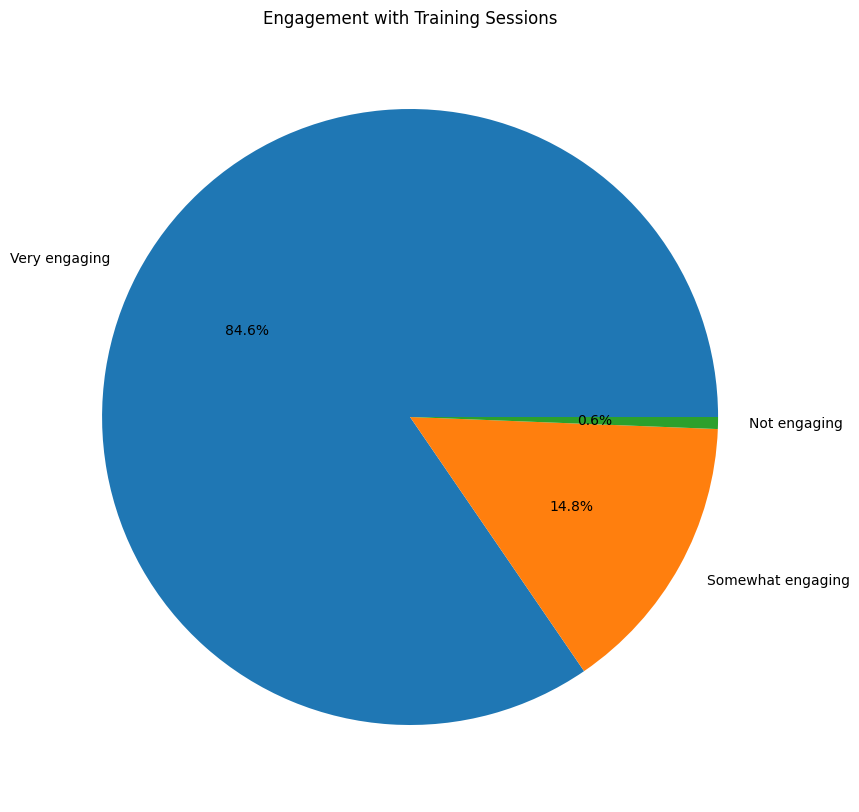

In [91]:
engaging_res = df["how_engaging_did_you_find_the_training_sessions?"].value_counts()

plt.figure(figsize = (15,10))
plt.pie(engaging_res, labels=engaging_res.index, autopct='%1.1f%%')
plt.title("Engagement with Training Sessions")
plt.savefig("engagement.png")
plt.show()

In [81]:
df["how_effective_were_the_trainers_in_delivering_the_content?"].unique()

array(['Effective', 'Very effective', 'Somewhat effective', nan,
       'Not effective'], dtype=object)

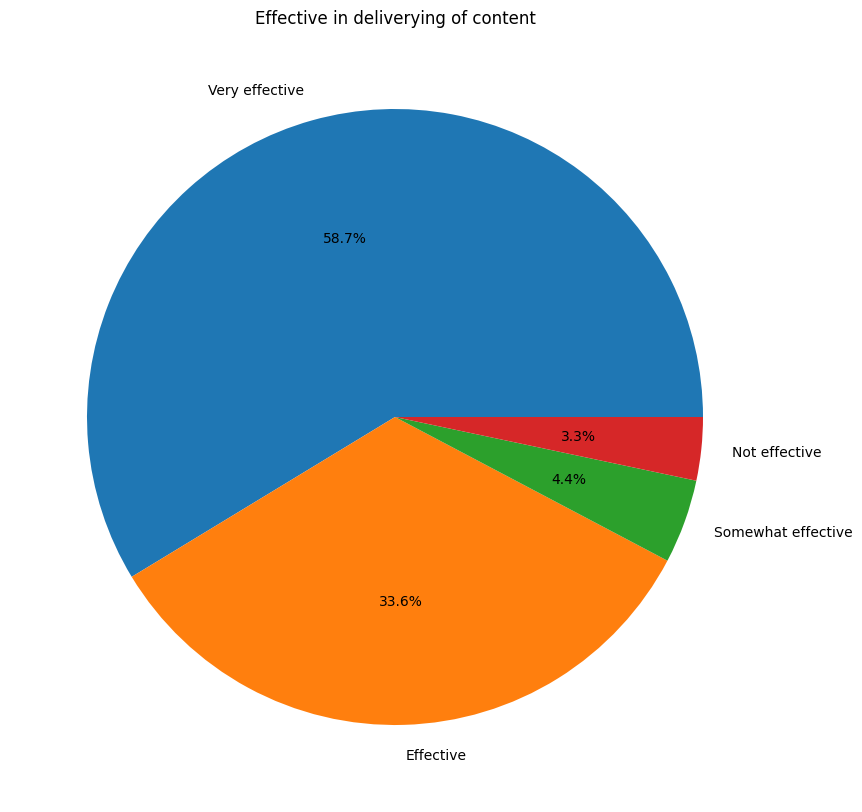

In [92]:
effective_delivery = df["how_effective_were_the_trainers_in_delivering_the_content?"].value_counts()

plt.figure(figsize = (15,10))
plt.pie(effective_delivery, labels=effective_delivery.index, autopct='%1.1f%%')
plt.title("Effective in deliverying of content")
plt.savefig("effective_deli.png")
plt.show()

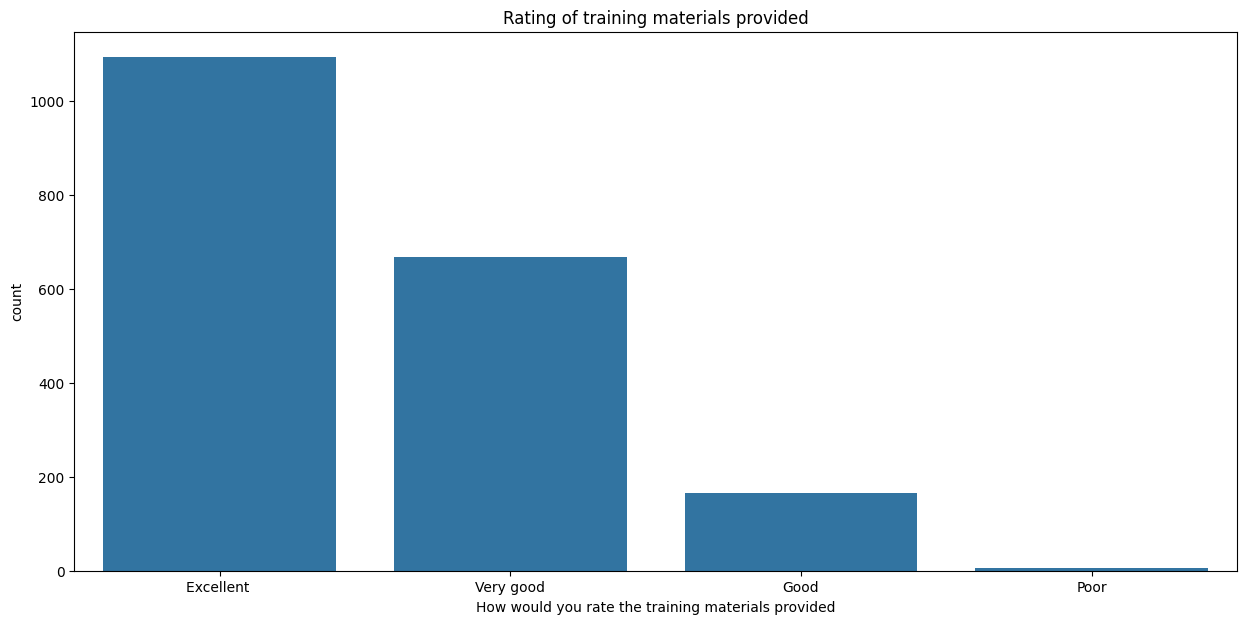

In [93]:
training_materials = df["how_would_you_rate_the_training_materials_provided?"].value_counts()

plt.figure(figsize = (15,7))
sns.barplot(data=training_materials)
plt.title("Rating of training materials provided")
plt.xlabel("How would you rate the training materials provided")
plt.savefig("training_materials.png")
plt.show()

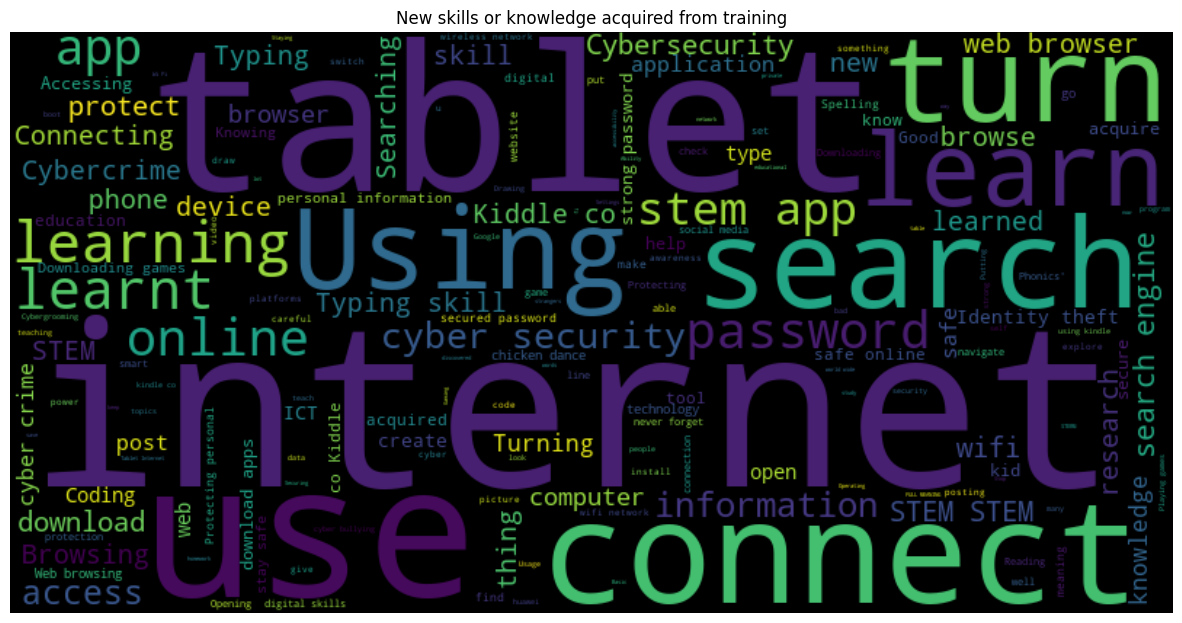

In [94]:
new_skills = df["what_new_skills_or_knowledge_did_you_acquire_from_the_training?"]

# Join all responses into a single string
text = " ".join(new_skills.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("New skills or knowledge acquired from training")
plt.axis("off")
plt.savefig("new_skills.png")
plt.show() 

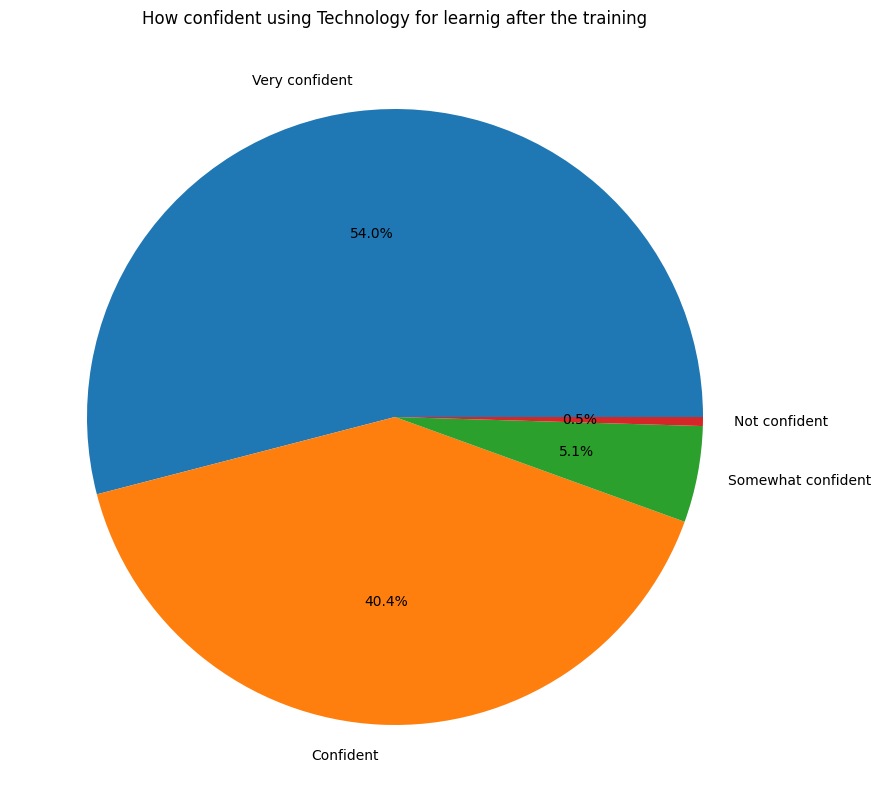

In [95]:
confident_using_tech = df["how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?"].value_counts()

plt.figure(figsize = (15,10))
plt.pie(confident_using_tech, labels=confident_using_tech.index, autopct='%1.1f%%')
plt.title("How confident using Technology for learnig after the training")
plt.savefig("confi_using_tech.png")
plt.show()

In [86]:
df["what_challenges_did_you_encounter_while_using_technology_during_the_training?"].unique()

array(['How to type in the browser', 'NO CHALLENGES', 'Spelling',
       'Internet problems', 'Light out', 'NAVIGATING', 'Power outage',
       nan, 'Power out', 'NOT VERY WELL UNDERSTOOD', 'Navigating the app',
       'Emergency Light out', 'frequent light out', 'light out',
       'no more time', 'light off', 'Unstable internet connectivity',
       'Inadequate laptops', 'Light Off',
       'Lack of internet connectivity.  Not being able to fully utilize the stem app',
       'our light was going off all the time', 'Internet',
       'Internet connectivity', 'Internet and limited tablet',
       'Emergency light out',
       'Internet connectivity and limited number of tablets',
       'NETWORK CHALLENGE', 'NETWORK PROBLEMS',
       'I DID NOT ENCOUNTER ANY CHALLENGE', 'How to open the tablet',
       'how to open the tablet', 'no problem', 'Network issues',
       'Network problems', 'Breaking of network', 'there is no problem',
       "i didn't see any problem", 'No challenge', 'No

In [87]:
df.columns

Index(['start_time', 'end_time', '1. Name ', 'age', 'gender', 'name_of_school',
       'grade_or_class', 'region_of_school',
       'how_would_you_rate_the_overall_training_experience?',
       'what_aspects_of_the_training_did_you_enjoy_most?',
       'were_the_training_objectives_clearly_communicated?',
       'how_engaging_did_you_find_the_training_sessions?',
       'how_effective_were_the_trainers_in_delivering_the_content?',
       'how_would_you_rate_the_training_materials_provided?',
       'what_new_skills_or_knowledge_did_you_acquire_from_the_training?',
       'how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?',
       'what_challenges_did_you_encounter_while_using_technology_during_the_training?',
       'how_do_you_plan_to_apply_what_you_learned_in_your_studies?',
       'what_topics_would_you_like_to_see_covered_in_future_training_sessions?',
       'do_you_have_any_suggestions_to_improve_the_training_program?',
       'any_additional_comments

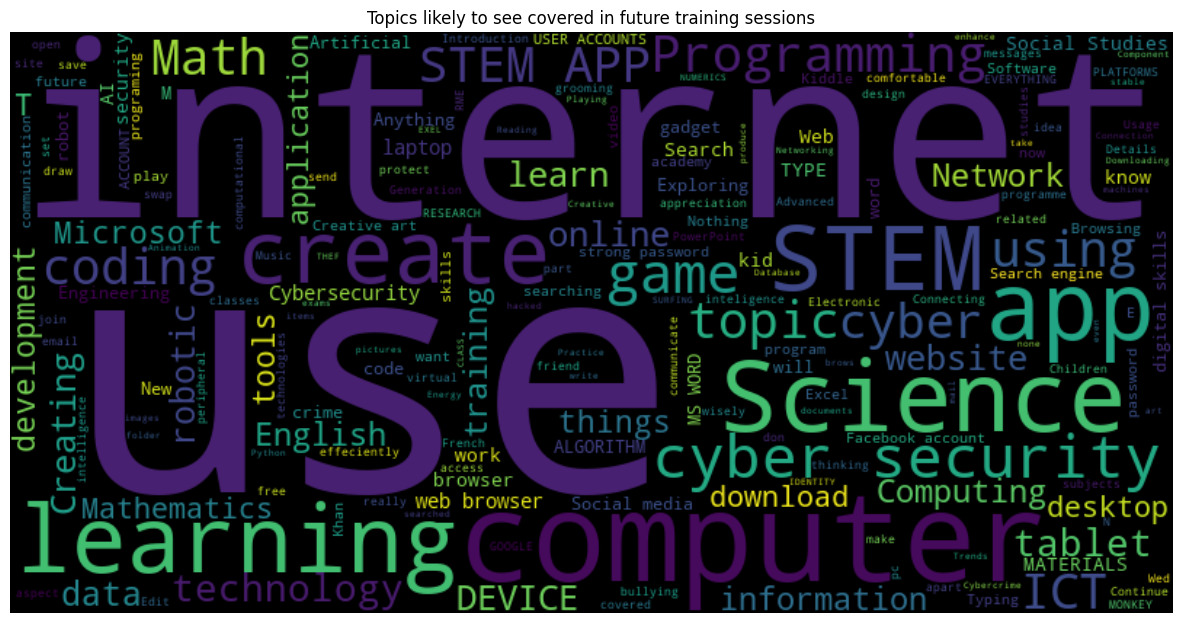

In [96]:
future_topics = df["what_topics_would_you_like_to_see_covered_in_future_training_sessions?"].value_counts()

# Join all responses into a single string
text = " ".join(future_topics.index) 

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Topics likely to see covered in future training sessions")
plt.axis("off")
plt.savefig("topics.png")
plt.show()